In [1]:
import trimesh
import sys
sys.path.append("/scr/ig_pipeline/")
import b1k_pipeline.utils

In [8]:
import tqdm

objects_fs = b1k_pipeline.utils.ParallelZipFS("objects.zip")
surface_areas = {}
obj_files = [x.path for x in objects_fs.glob("objects/*/*/shape/visual/*.obj")]

In [9]:
for obj_file in tqdm.tqdm(obj_files):
    obj = b1k_pipeline.utils.load_mesh(objects_fs, obj_file, load_texture=False)
    surface_areas[obj_file] = obj.area

100%|██████████| 9032/9032 [07:39<00:00, 19.67it/s]  


In [23]:
# Disregard floors for now
interesting_surface_areas = {k: v for k, v in surface_areas.items() if "objects/floors" not in k and "objects/walls" not in k and "objects/ceilings" not in k and "objects/driveway" not in k and "objects/lawn" not in k and "objects/background" not in k and "objects/roof" not in k and "objects/swimming_pool" not in k}

In [10]:
import matplotlib.pyplot as plt

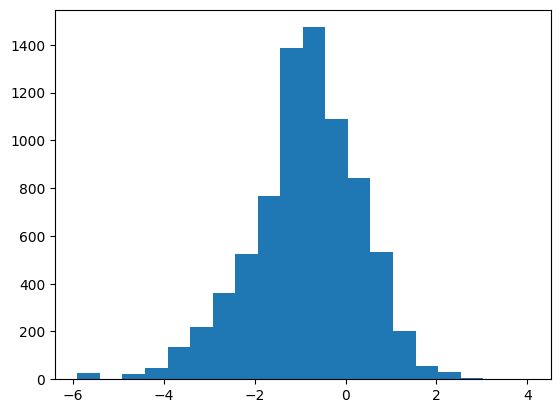

In [31]:
import numpy as np
data = np.array(list(interesting_surface_areas.values()))
plt.hist(np.log(data) / np.log(10), bins=20)
plt.show()

In [29]:
[x for x in sorted(interesting_surface_areas.items(), key=lambda x: x[1], reverse=False)][:20]

[('/objects/bottle_of_lemon_juice/vsjter/shape/visual/bottle_of_lemon_juice-vsjter-cap.obj',
  1.260206229132992e-06),
 ('/objects/ginger/eoikjc/shape/visual/ginger-eoikjc-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/flour/xmctdk/shape/visual/flour-xmctdk-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/mustard_seasoning/wsjhrf/shape/visual/mustard_seasoning-wsjhrf-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/pumpkin_pie_spice/ccevus/shape/visual/pumpkin_pie_spice-ccevus-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/cocoa_powder/ymkwck/shape/visual/cocoa_powder-ymkwck-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/soil/kkrybm/shape/visual/soil-kkrybm-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/soil/nwgosx/shape/visual/soil-nwgosx-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/cinnamon/vpxzao/shape/visual/cinnamon-vpxzao-base_link.obj',
  3.0416128829745755e-06),
 ('/objects/onion_powder/vqzdvn/shape/visual/onion_powder-vqzdv